The data refers to Daily prices of various commodities in India of all the states and districts. It has the wholesale maximum price, minimum price and modal price on daily basis. This dataset is generated through the AGMARKNET Portal (http://agmarknet.gov.in), which disseminates daily market information of various commodities.


According to the AGMARKNET Portal, the prices in the dataset refer to the wholesale prices of various commodities per quintal (100 kg) in Indian rupees. The wholesale price is the price at which goods are sold in large quantities to retailers or distributors.


Features of the dataset include:


State: The state in India where the market is located.
District: The district in India where the market is located.
Market: The name of the market.
Commodity: The name of the commodity.
Variety: The variety of the commodity.
Grade: The grade or quality of the commodity.
Min Price: (INR) The minimum wholesale price of the commodity on a given day, per quintal (100 kg).
Max Price: (INR) The maximum wholesale price of the commodity on a given day, per quintal (100 kg).
Modal Price: (INR) The most common or representative wholesale price of the commodity on a given day, per quintal (100 kg).
1 INR = 0.012 USD (as on 7 July, 2023)


This dataset can be useful for data science and machine learning applications in several ways. For example:


Market analysis: You can use this dataset to analyze trends and patterns in the wholesale prices of various commodities across different markets in India. This can help you understand factors that affect prices, such as supply and demand, seasonality, and market conditions.
Commodity recommendation: Develop recommender systems that suggest the best markets or commodities for farmers or traders to sell or buy based on their location, preferences, and market conditions.

Importing Libs

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [146]:
df=pd.read_csv('D:\\vscode\\Price of Agricultural Commodities Data\\daily_price.csv')
df.head()

,State,District,Market,Commodity,Variety,Grade,Min Price,Max Price,Modal Price
0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,3200.0,3400.0,3200.0
1,Andhra Pradesh,Chittor,Chittoor,Mango,Neelam,Medium,700.0,1500.0,1200.0
2,Andhra Pradesh,Chittor,Chittoor,Mango,Totapuri,Medium,1400.0,1800.0,1600.0
3,Andhra Pradesh,Cuddapah,Cuddapah,Groundnut,Local,FAQ,4059.0,7589.0,7559.0
4,Andhra Pradesh,Cuddapah,Cuddapah,Turmeric,Bulb,FAQ,4778.0,6160.0,5845.0


In [147]:
df.shape

(5557, 9)

In [148]:
df.describe()

,Min Price,Max Price,Modal Price
count,5557.000000,5557.000000,5557.000000
mean,4109.732091,4694.127320,4417.495256
std,4667.234302,5236.560123,4962.823629
min,0.000000,0.000000,0.720000
25%,1700.000000,2000.000000,1900.000000
50%,2660.000000,3100.000000,3000.000000
75%,5300.000000,5950.000000,5550.000000
max,95000.000000,115000.000000,110000.000000


In [149]:
df.describe(include='all')

,State,District,Market,Commodity,Variety,Grade,Min Price,Max Price,Modal Price
count,5557,5557,5557,5557,5557,5557,5557.000000,5557.000000,5557.000000
unique,23,245,531,186,293,4,NaN,NaN,NaN
top,Uttar Pradesh,Palakad,Palakkad,Potato,Other,FAQ,NaN,NaN,NaN
freq,1944,162,49,286,1974,4802,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4109.732091,4694.127320,4417.495256
std,NaN,NaN,NaN,NaN,NaN,NaN,4667.234302,5236.560123,4962.823629
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.720000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1700.000000,2000.000000,1900.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2660.000000,3100.000000,3000.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,5300.000000,5950.000000,5550.000000


INFORMATION

In [150]:
class info():
    def __init__(self):
        self.df=df
    def info_(self):
        info__=df.info()
        return info__
    def is_null_sum(self):
        null_sum=df.isnull().sum()/100,("%")
        print("-----------------------------------")
        return null_sum
    def des_cribe(self):
        des=df.describe()
        print("-----------------------------------")
        return des
    def uni_que(self):
        uniquee=df.unique()
df1=info()
print(df1.info_())
print(df1.is_null_sum())
print(df1.des_cribe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5557 entries, 0 to 5556
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        5557 non-null   object 
 1   District     5557 non-null   object 
 2   Market       5557 non-null   object 
 3   Commodity    5557 non-null   object 
 4   Variety      5557 non-null   object 
 5   Grade        5557 non-null   object 
 6   Min Price    5557 non-null   float64
 7   Max Price    5557 non-null   float64
 8   Modal Price  5557 non-null   float64
dtypes: float64(3), object(6)
memory usage: 390.9+ KB
None
-----------------------------------
(State          0.0
District       0.0
Market         0.0
Commodity      0.0
Variety        0.0
Grade          0.0
Min Price      0.0
Max Price      0.0
Modal Price    0.0
dtype: float64, '%')
-----------------------------------
          Min Price      Max Price    Modal Price
count   5557.000000    5557.000000    5557.000000
mean    

unique Values

In [151]:
for i in df.columns:
    print(i,"------------>",df[i].unique())

State ------------> ['Andhra Pradesh' 'Chandigarh' 'Chattisgarh' 'Goa' 'Gujarat' 'Haryana'
 'Himachal Pradesh' 'Jammu and Kashmir' 'Kerala' 'Madhya Pradesh'
 'Meghalaya' 'Nagaland' 'NCT of Delhi' 'Odisha' 'Pondicherry' 'Punjab'
 'Rajasthan' 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh'
 'Uttrakhand' 'West Bengal']
District ------------> ['Chittor' 'Cuddapah' 'East Godavari' 'Guntur' 'Kurnool' 'Visakhapatnam'
 'Chandigarh' 'Balodabazar' 'Balrampur' 'Bastar' 'Bijapur' 'Bilaspur'
 'Dantewada' 'Durg' 'Kanker' 'Koria' 'Mungeli' 'Narayanpur' 'Raigarh'
 'Raipur' 'North Goa' 'Amreli' 'Anand' 'Banaskanth' 'Bharuch' 'Bhavnagar'
 'Dahod' 'Gandhinagar' 'Jamnagar' 'Junagarh' 'Kheda' 'Morbi' 'Navsari'
 'Patan' 'Rajkot' 'Sabarkantha' 'Surat' 'Surendranagar' 'Vadodara(Baroda)'
 'Ambala' 'Faridabad' 'Fatehabad' 'Gurgaon' 'Hissar' 'Karnal'
 'Kurukshetra' 'Mahendragarh-Narnaul' 'Mewat' 'Palwal' 'Panchkula'
 'Panipat' 'Rewari' 'Rohtak' 'Sirsa' 'Sonipat' 'Yamuna Nagar' 'Chamba'
 'Hamirpur' 'Kangra' 'K

In [152]:
df[df['Grade'] == "FAQ"]

,State,District,Market,Commodity,Variety,Grade,Min Price,Max Price,Modal Price
0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,3200.0,3400.0,3200.0
3,Andhra Pradesh,Cuddapah,Cuddapah,Groundnut,Local,FAQ,4059.0,7589.0,7559.0
4,Andhra Pradesh,Cuddapah,Cuddapah,Turmeric,Bulb,FAQ,4778.0,6160.0,5845.0
5,Andhra Pradesh,Cuddapah,Cuddapah,Turmeric,Finger,FAQ,3012.0,6619.0,6175.0
6,Andhra Pradesh,East Godavari,Peddapuram,Paddy(Dhan)(Common),1001,FAQ,2040.0,2050.0,2045.0
...,...,...,...,...,...,...,...,...,...
5552,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Rice,Common,FAQ,3000.0,3200.0,3100.0
5553,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Rice,Super Fine,FAQ,5000.0,5200.0,5100.0
5554,West Bengal,Uttar Dinajpur,Islampur,Jute,TD-5,FAQ,5500.0,5700.0,5600.0
5555,West Bengal,Uttar Dinajpur,Islampur,Potato,F.A.Q.,FAQ,1250.0,1350.0,1300.0


In [153]:
df.columns=df.columns.str.replace(" ",'_')

In [154]:
df.head()

,State,District,Market,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price
0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,3200.0,3400.0,3200.0
1,Andhra Pradesh,Chittor,Chittoor,Mango,Neelam,Medium,700.0,1500.0,1200.0
2,Andhra Pradesh,Chittor,Chittoor,Mango,Totapuri,Medium,1400.0,1800.0,1600.0
3,Andhra Pradesh,Cuddapah,Cuddapah,Groundnut,Local,FAQ,4059.0,7589.0,7559.0
4,Andhra Pradesh,Cuddapah,Cuddapah,Turmeric,Bulb,FAQ,4778.0,6160.0,5845.0


Heatmap

C:\Users\skyra\AppData\Local\Temp\ipykernel_5940\906918719.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr())


<Axes: >

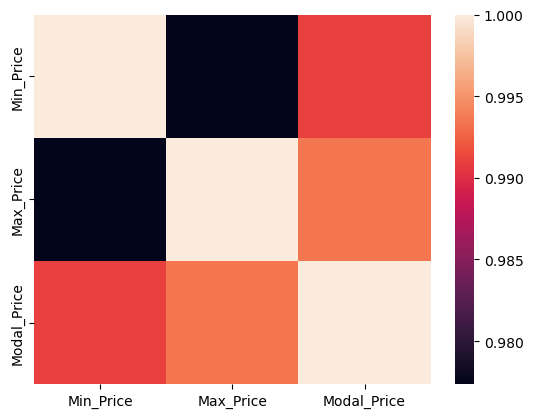

In [155]:
sns.heatmap(data=df.corr())

Heatmap

<Axes: >

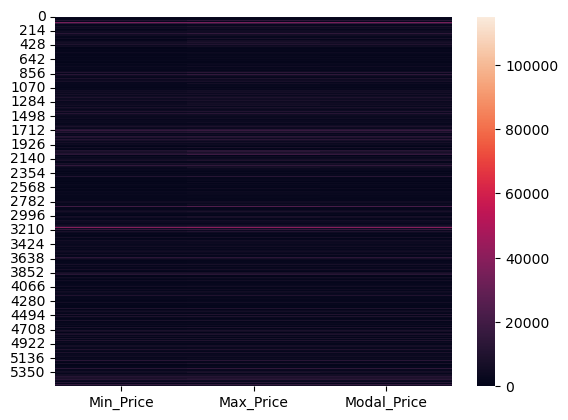

In [156]:
hist=df.select_dtypes(include=np.number)
sns.heatmap(data=hist)

BOX PLOT

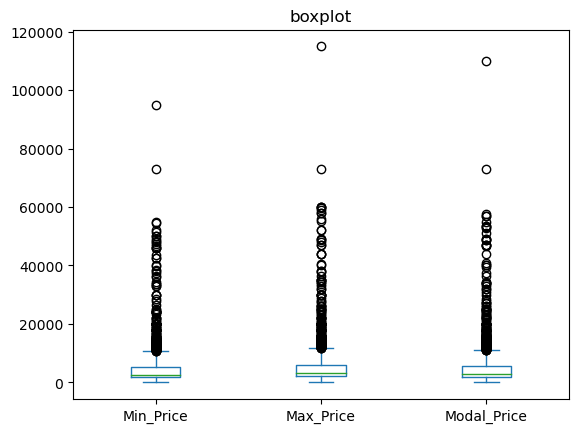

In [157]:
ax = df[['Min_Price', 'Max_Price', 'Modal_Price']].plot(kind='box', title='boxplot')

HISTPLOT

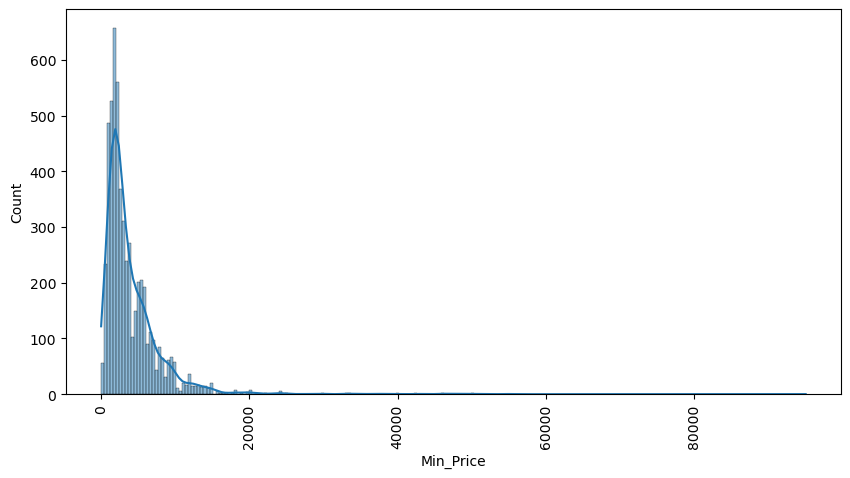

In [158]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['Min_Price'],kde=True)
plt.xticks(rotation=90)
plt.show()

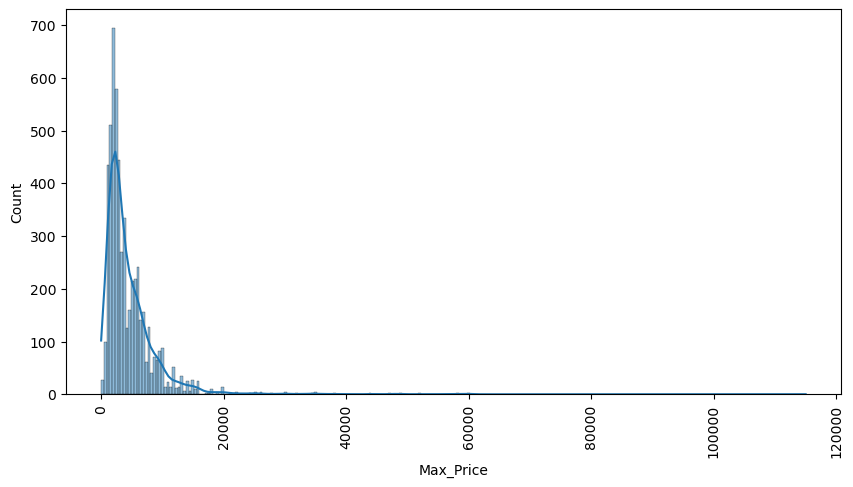

In [159]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['Max_Price'],kde=True)
plt.xticks(rotation=90)
plt.show()

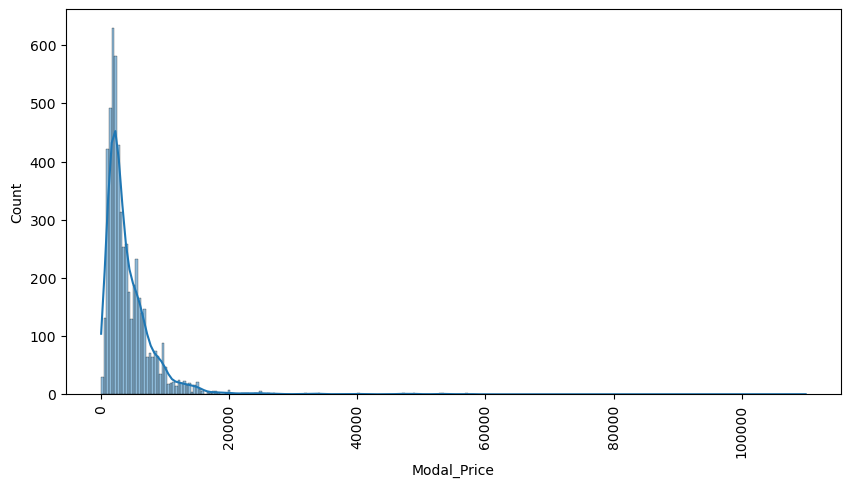

In [160]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['Modal_Price'],kde=True)
plt.xticks(rotation=90)
plt.show()

In [161]:
df.columns

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Min_Price', 'Max_Price', 'Modal_Price'],
      dtype='object')

State_count

<Axes: xlabel='State', ylabel='count'>

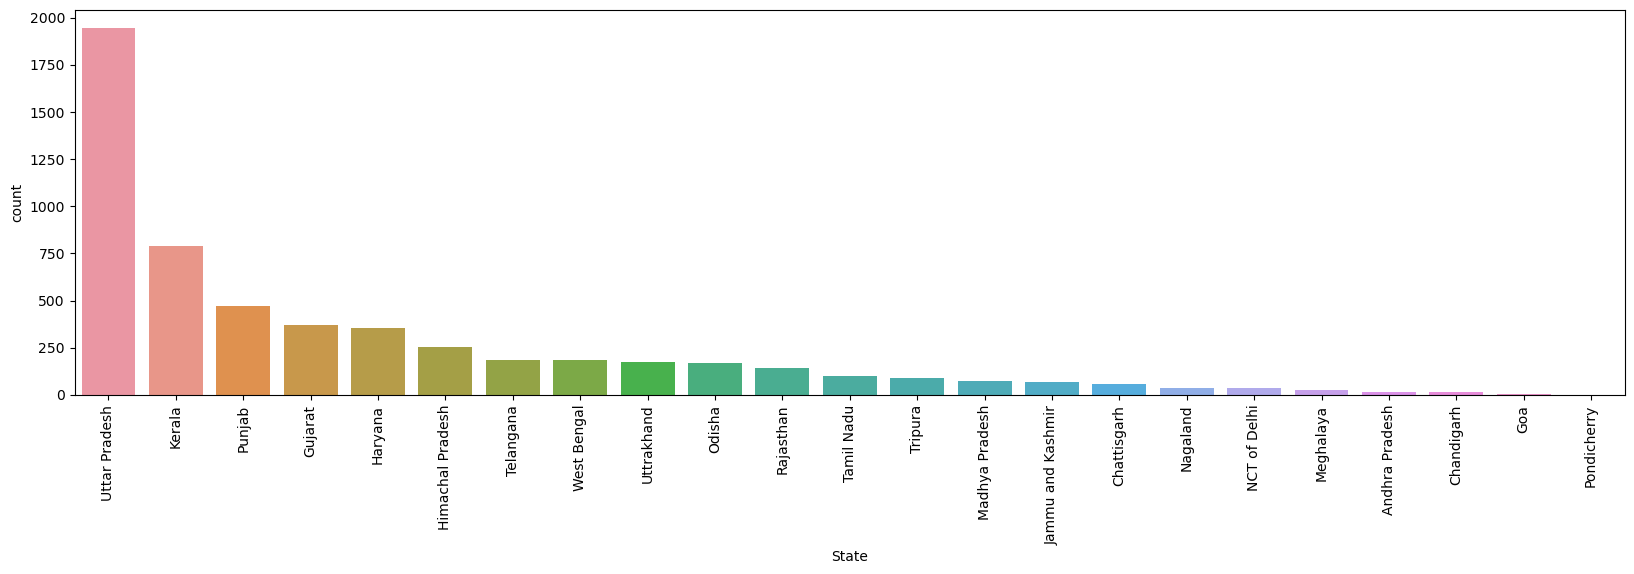

In [162]:
def count_plot_State(data=df):
    plt.figure(figsize=(20,5))
    plot=sns.countplot(x=df['State'],order=df.State.value_counts().index)
    plt.xticks(rotation=90)
    return plot
count_plot_State()

District_count

<Axes: xlabel='District', ylabel='count'>

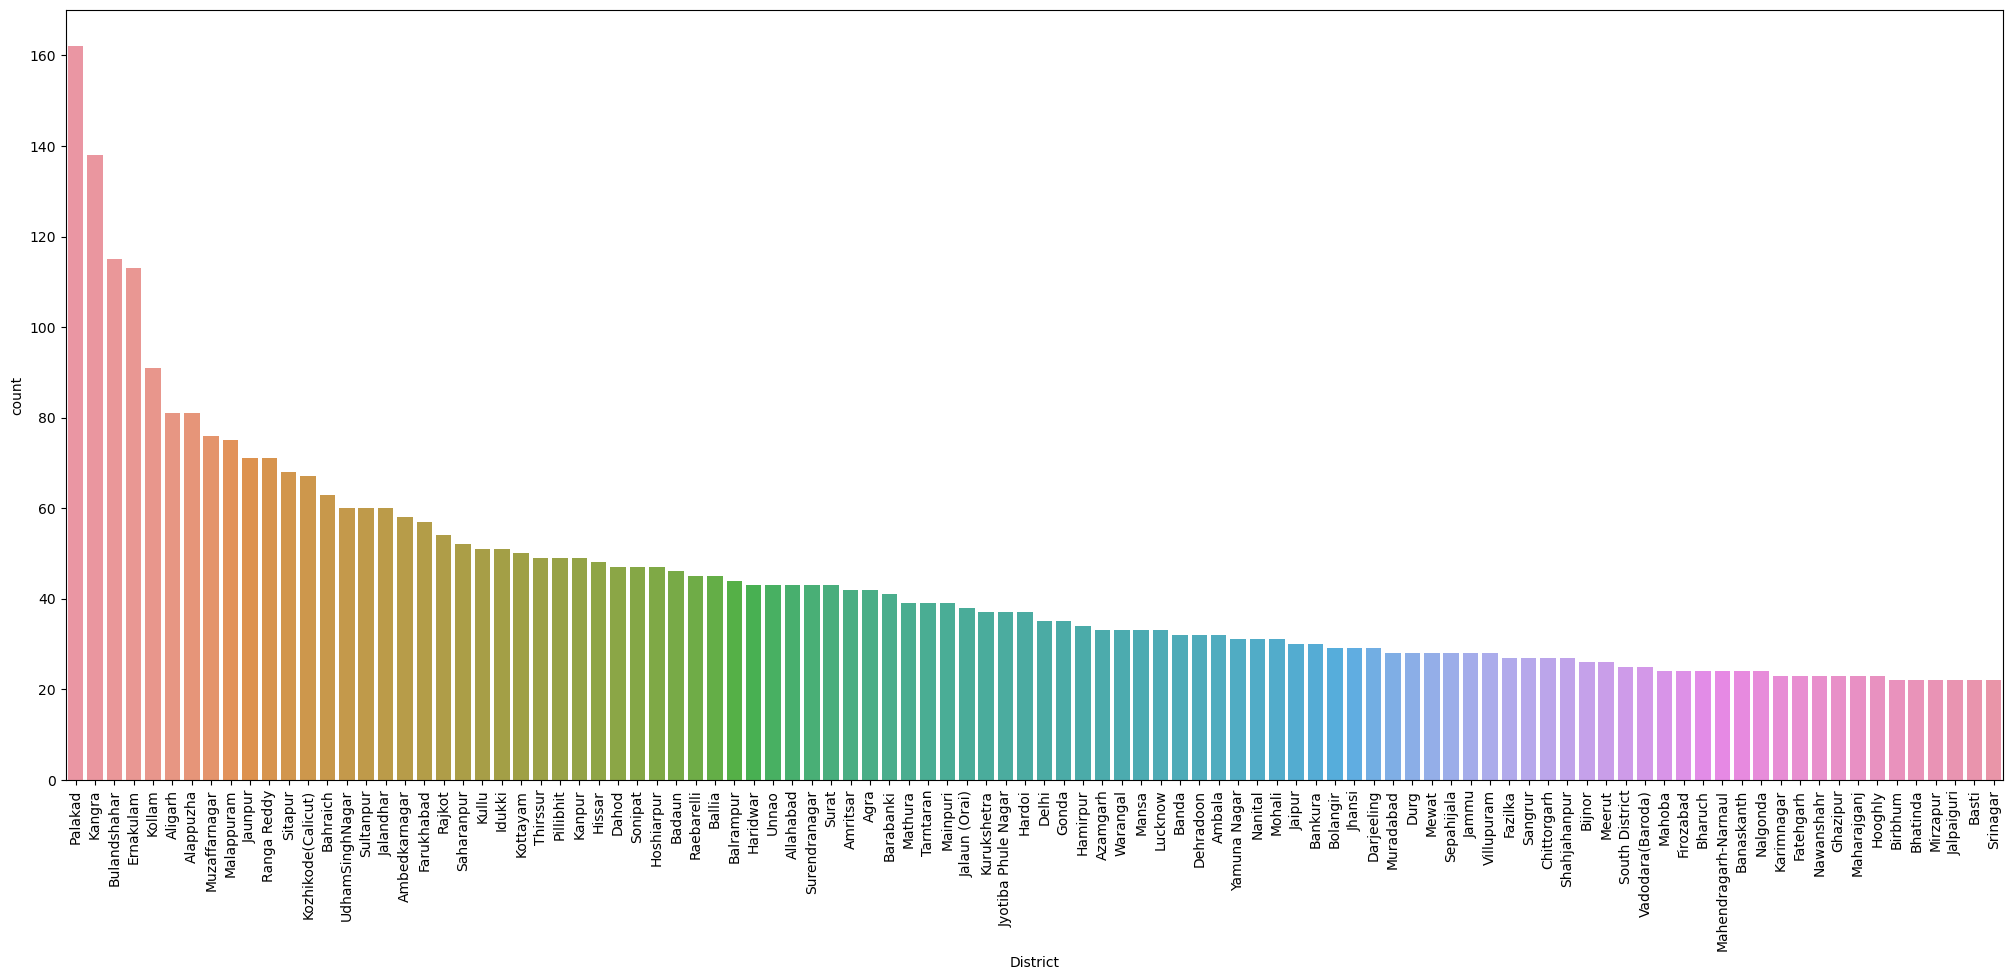

In [163]:
def count_plot_District(data=df):
    plt.figure(figsize=(25,10))
    plot=sns.countplot(x=df['District'],order=df.District.value_counts().iloc[:100].index)
    plt.xticks(rotation=90)
    return plot
count_plot_District()

Market_count

<Axes: xlabel='Market', ylabel='count'>

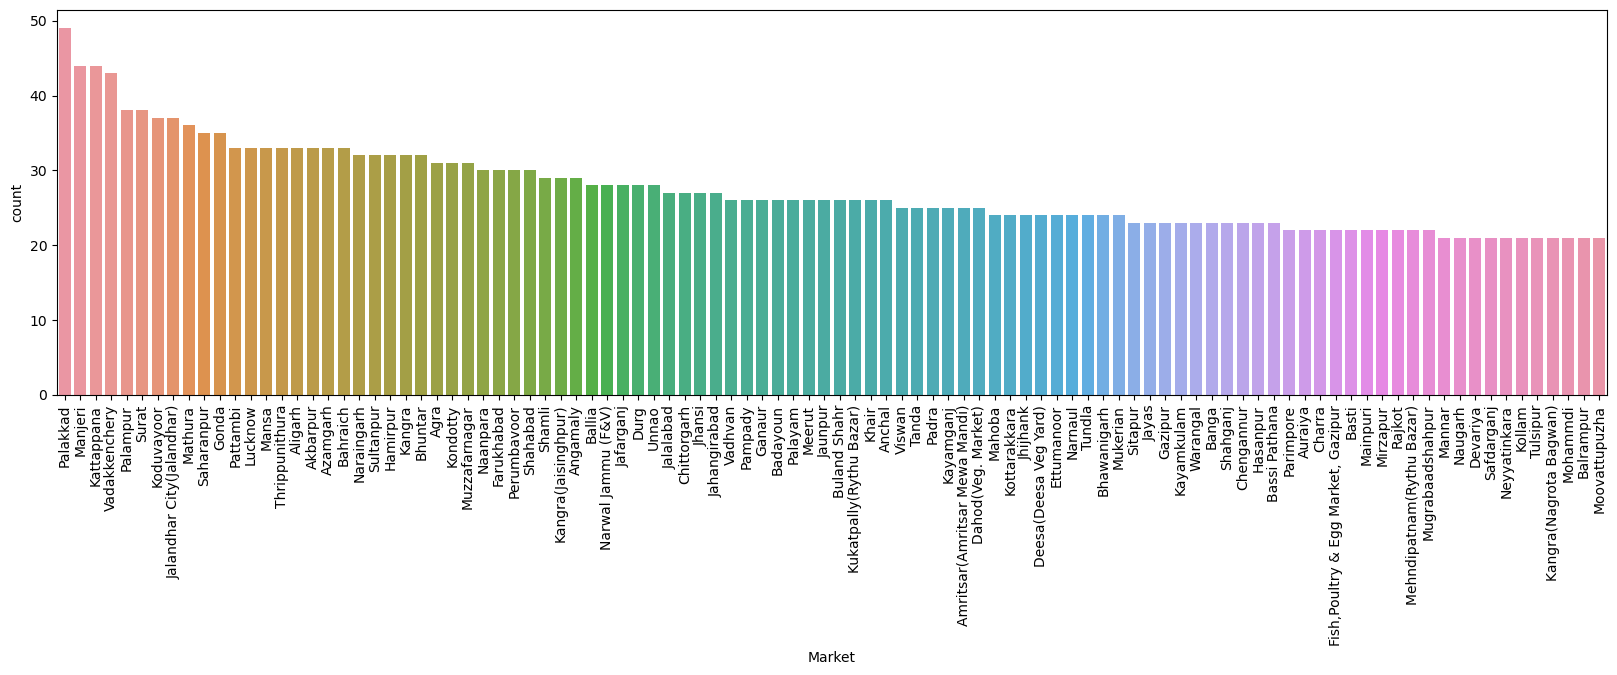

In [164]:
def count_plot_Market(data=df):
    plt.figure(figsize=(20,5))
    plot=sns.countplot(x=df['Market'],order=df.Market.value_counts().iloc[:100].index)
    plt.xticks(rotation=90)
    return plot
count_plot_Market()

Commodity_count

<Axes: xlabel='Commodity', ylabel='count'>

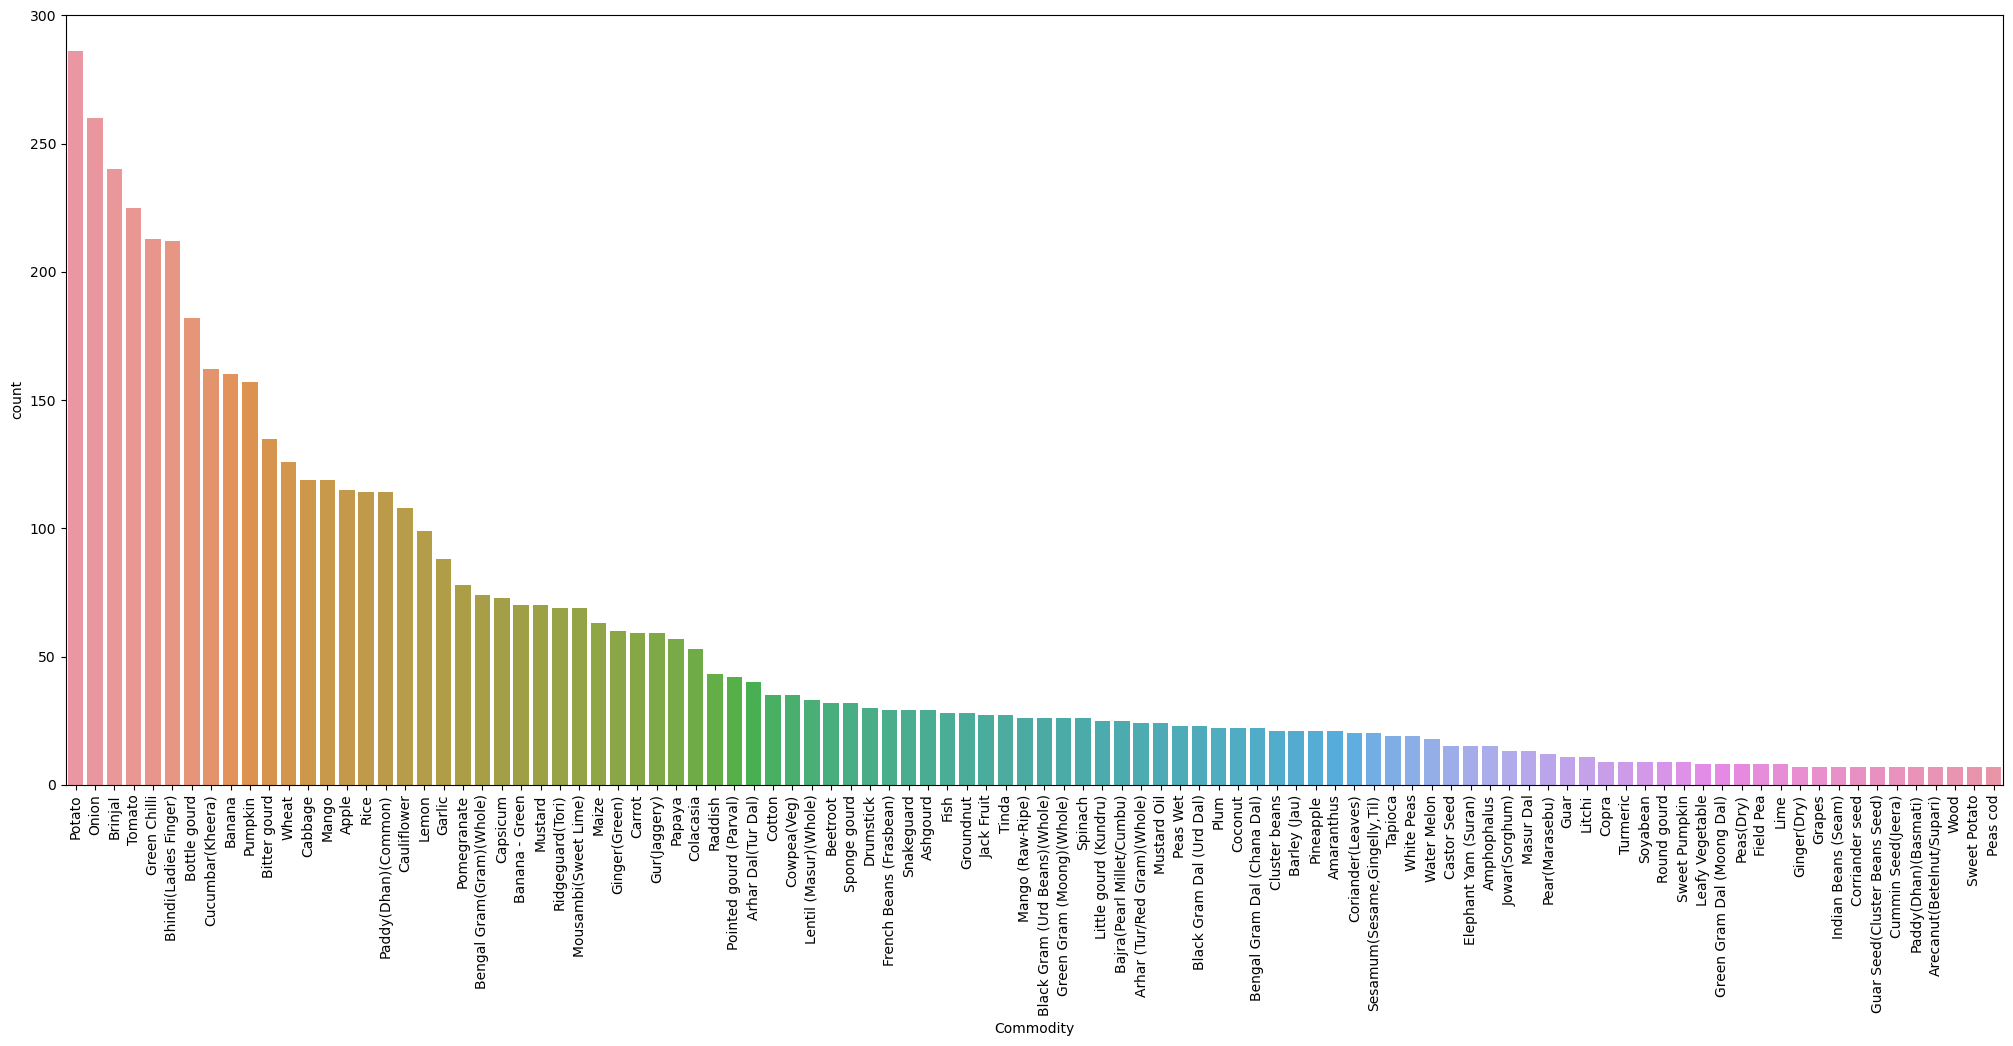

In [165]:
def count_plot_Commodity(data=df):
    plt.figure(figsize=(25,10))
    plot=sns.countplot(x=df['Commodity'],order=df.Commodity.value_counts().iloc[:100].index)
    plt.xticks(rotation=90)
    return plot
count_plot_Commodity()

Variety_count

<Axes: xlabel='Variety', ylabel='count'>

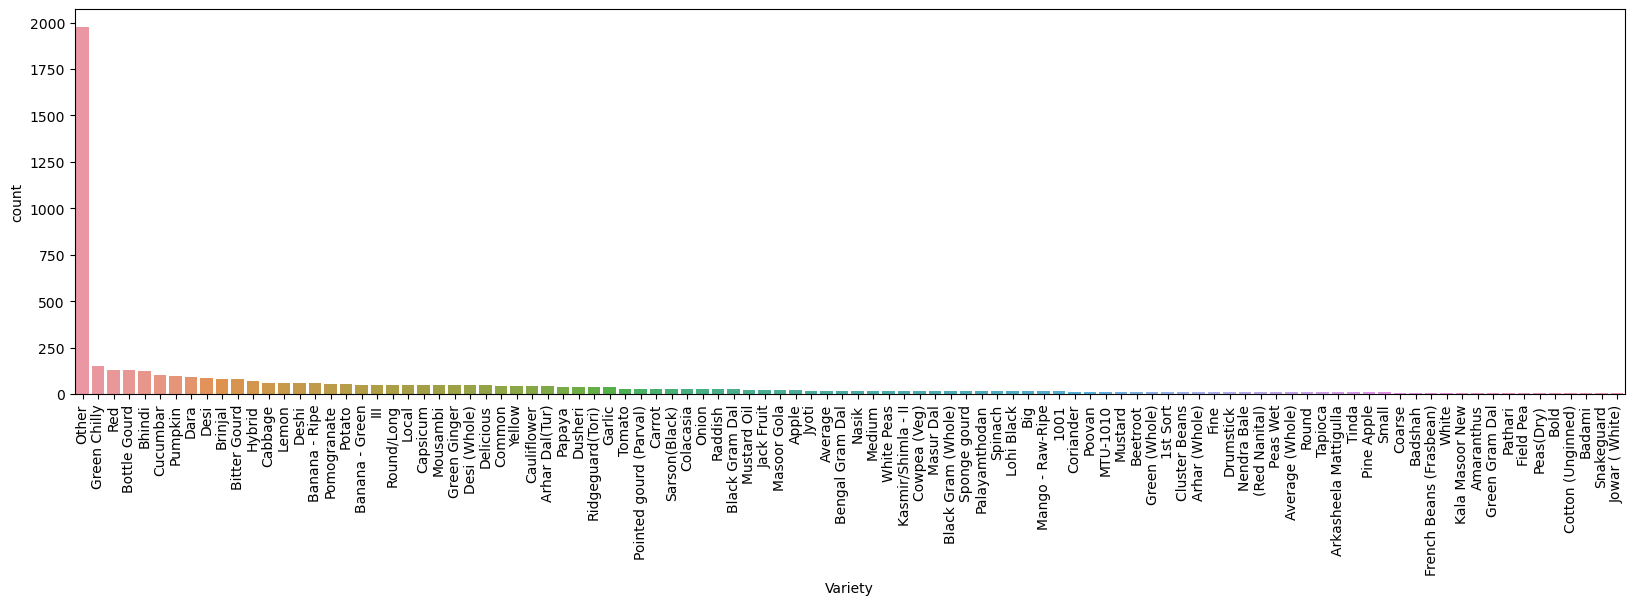

In [166]:
def count_plot_Variety(data=df):
    plt.figure(figsize=(20,5))
    plot=sns.countplot(x=df['Variety'],order=df.Variety.value_counts().iloc[:100].index,)
    plt.xticks(rotation=90)
    return plot
count_plot_Variety()

Grade_count_plot

<Axes: xlabel='Grade', ylabel='count'>

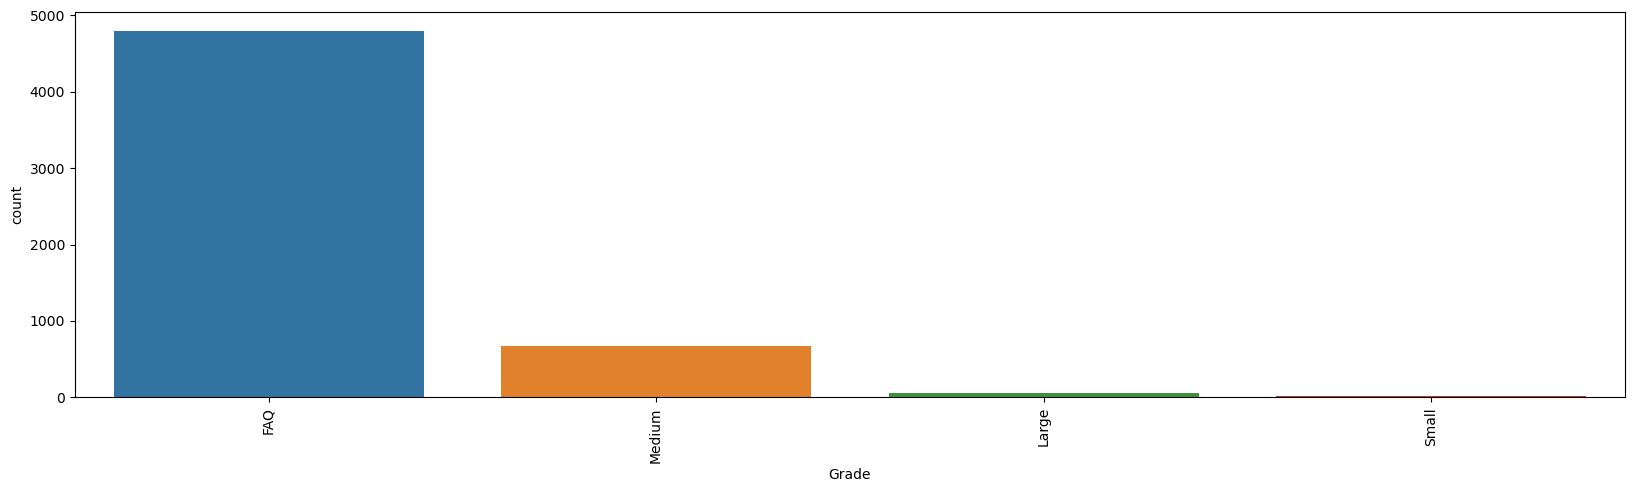

In [167]:
def count_plot_Grade(data=df):
    plt.figure(figsize=(20,5))
    plot=sns.countplot(x=df['Grade'],order=df.Grade.value_counts().index,)
    plt.xticks(rotation=90)
    return plot
count_plot_Grade()

In [168]:
df.columns

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Min_Price', 'Max_Price', 'Modal_Price'],
      dtype='object')

State_Max_Price

<Axes: xlabel='State', ylabel='Max_Price'>

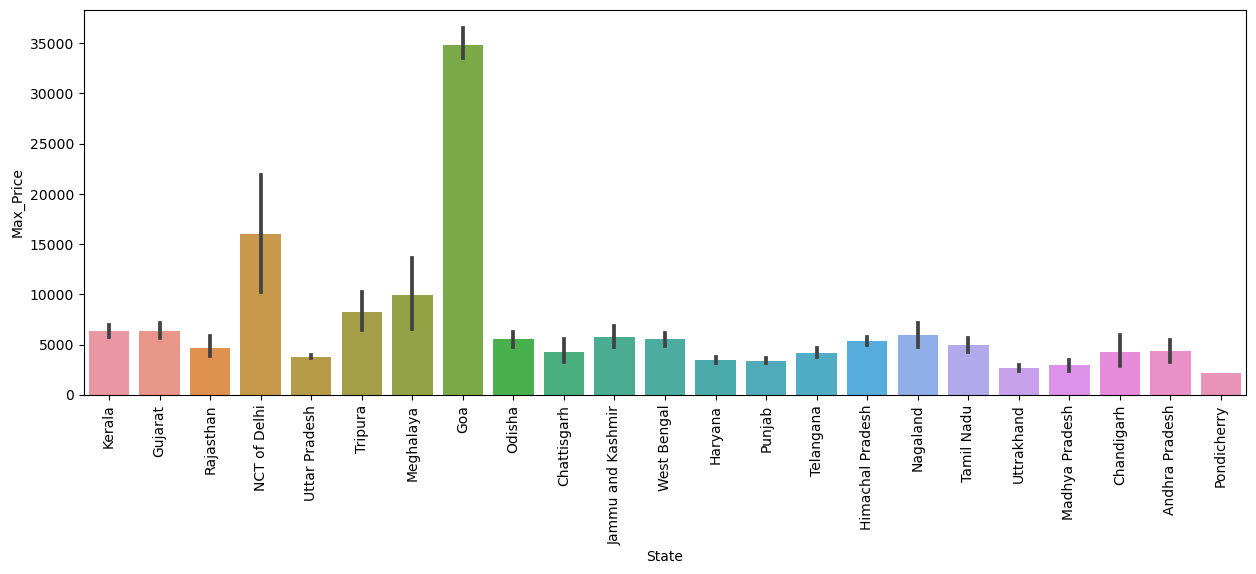

In [169]:
def cat_plot_State_max_price():
    plt.figure(figsize=(15,5))
    cat_plot_State_max_pricee=sns.barplot(x="State", y="Max_Price", data=df.sort_values('Max_Price',ascending=False))
    plt.xticks(rotation=90)
    return cat_plot_State_max_pricee
cat_plot_State_max_price()

District_Max_Price

<Axes: xlabel='District', ylabel='Max_Price'>

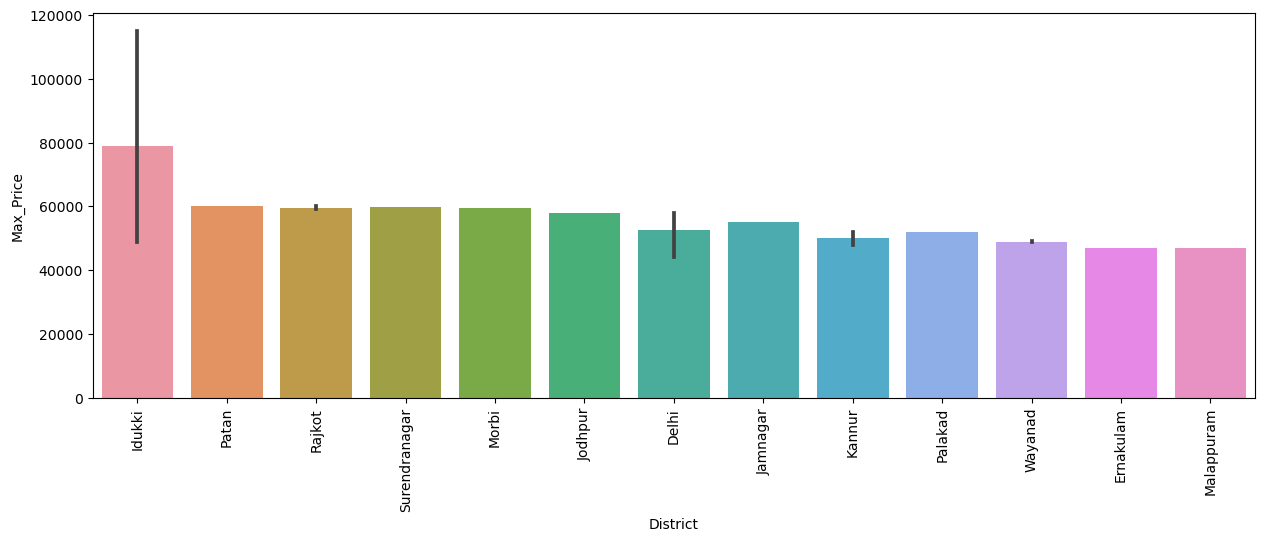

In [170]:
def cat_plot_District_max_price():
    plt.figure(figsize=(15,5))
    cat_plot_District_max_pricee=sns.barplot(x="District", y="Max_Price", data=df.sort_values('Max_Price',ascending=False).head(20))
    plt.xticks(rotation=90)
    return cat_plot_District_max_pricee
cat_plot_District_max_price()

Market_Max_Price

<Axes: xlabel='Market', ylabel='Max_Price'>

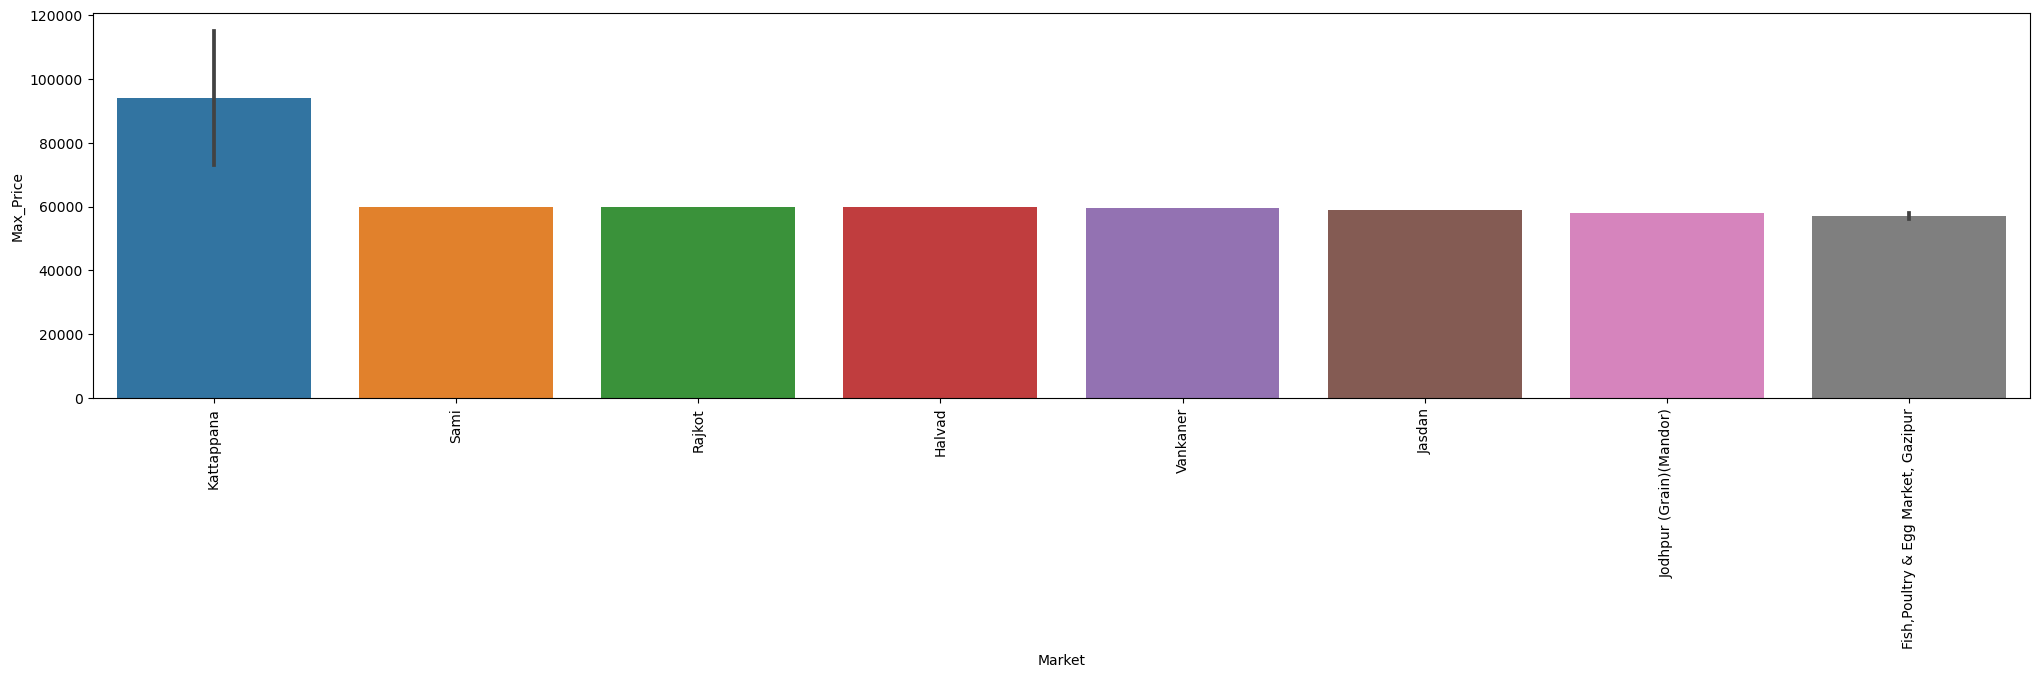

In [171]:
def cat_plot_Market():
    plt.figure(figsize=(25,5))
    cat_plot_Markett=sns.barplot(x="Market", y="Max_Price", data=df.sort_values('Max_Price',ascending=False).head(10))
    plt.xticks(rotation=90)
    return cat_plot_Markett
cat_plot_Market()

Commodity_max_price_plot

<Axes: xlabel='Commodity', ylabel='Max_Price'>

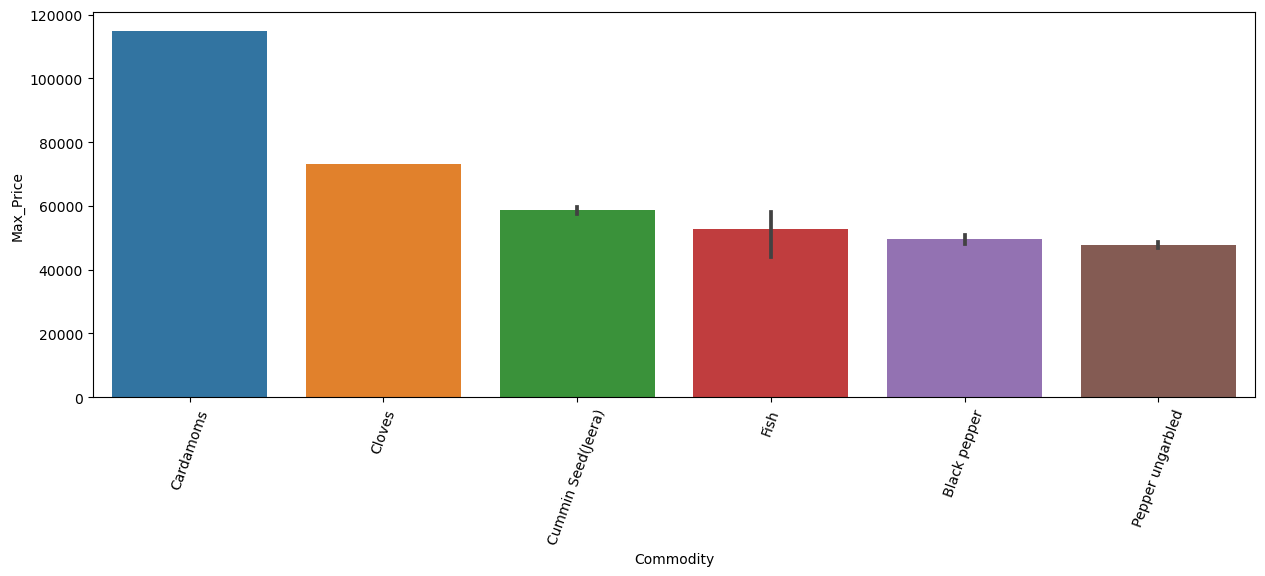

In [172]:
def cat_plot_Commodity():
    plt.figure(figsize=(15,5))
    cat_plot_Commodityy=sns.barplot(x="Commodity", y="Max_Price", data=df.sort_values('Max_Price',ascending=False).head(20))
    plt.xticks(rotation=70)
    return cat_plot_Commodityy
cat_plot_Commodity()

Variety_Max_Price_Plot

<Axes: xlabel='Variety', ylabel='Max_Price'>

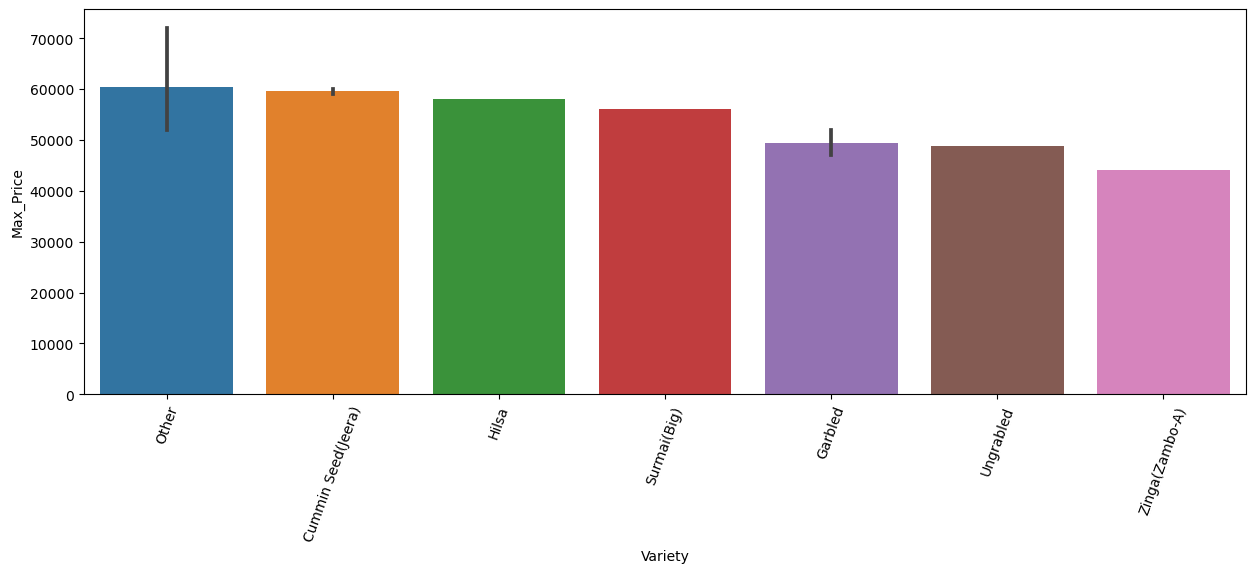

In [173]:
def cat_plot_Variety():
    plt.figure(figsize=(15,5))
    cat_plot_Varietyy=sns.barplot(x="Variety", y="Max_Price", data=df.sort_values('Max_Price',ascending=False).head(20))
    plt.xticks(rotation=70)
    return cat_plot_Varietyy
cat_plot_Variety()

Mapping df['Grade]
 &
 splitting the data

In [174]:
grade_mapping = {'low': 1, 'medium': 2, 'high': 3, 'FAQ' : 4}
df['Grade'] = df['Grade'].map(grade_mapping)

X = df[['Min_Price', 'Max_Price', 'Grade']]
y = df['Modal_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Transforming Data

In [175]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

Linear Model

In [176]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

Decision Tree Regressor

In [177]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

Forest Model

In [178]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_r2 = r2_score(y_test, forest_pred)

Gradient Boost Regressor

In [179]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

Support Vector

In [180]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

Printing R-Squared

In [181]:
print('Linear Regression - R-squared:', linear_r2)
print('Decision Tree Regression - R-squared:', tree_r2)
print('Random Forest Regression - R-squared:', forest_r2)
print('Gradient Boosting Regression - R-squared:', gb_r2)
print('Support Vector Regression (SVR) - R-squared:', svr_r2)

Linear Regression - R-squared: 0.9989097633580929
Decision Tree Regression - R-squared: 0.9931873804341649
Random Forest Regression - R-squared: 0.9947209127294826
Gradient Boosting Regression - R-squared: 0.9954351381517388
Support Vector Regression (SVR) - R-squared: 0.15226320015467254


Plotting R2

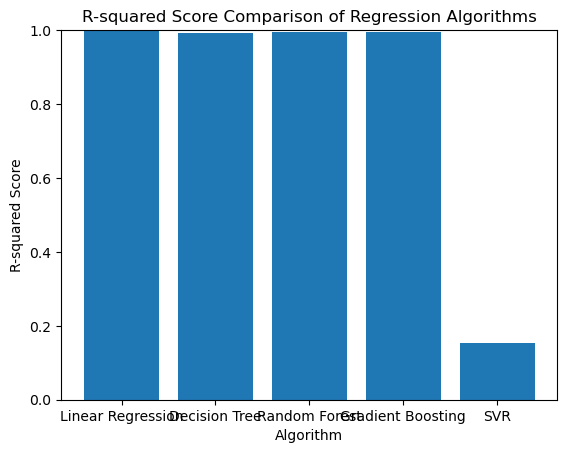

In [182]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR']
r2_scores = [linear_r2, tree_r2, forest_r2, gb_r2, svr_r2]

plt.bar(models, r2_scores)
plt.xlabel('Algorithm')
plt.ylabel('R-squared Score')
plt.title('R-squared Score Comparison of Regression Algorithms')
plt.ylim([0, 1]) 
plt.show()

In [183]:
#END